A one-layer network $y=\sum_{i=1}^N c_i\sigma(w_ix+b_i)$ where $\sigma={\rm ReLU}$.

For the $i^{\rm th}$ neuron, the "kick" occurs at $k_i=-b_i/w_i$.

Suppose we aim to fit the function $y(x)=x^2$ where $x\in[-a,a]$, i.e., on a bounded region.

If a kick lies outside the region $[-a,a]$, we say the neuron is useless.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# step 1: generate data: y = x^2 #

seed = 5
np.random.seed(seed)
torch.manual_seed(seed)
w = 200

class Net(nn.Module):

    def __init__(self, w=100):
        super(Net, self).__init__()
        self.l1 = nn.Linear(1, w)
        self.l2 = nn.Linear(w, 1)

    def forward(self, x):
        self.f = torch.nn.LeakyReLU(0.0)
        self.x1 = self.f(self.l1(x))
        self.x2 = self.l2(self.x1)
        return self.x2
    
num = 1001
a = 1
x = torch.linspace(-a,a,steps=num).unsqueeze(dim=1)
label = x**2

In [3]:
# step2: training relu network

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

model = Net(w=w)

epochs = 5000
log = 1000

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
cornerss = []

for epoch in range(epochs):

    optimizer.zero_grad()

    outputs = model(x)
    loss = torch.mean((outputs-label)**2)
    loss.backward()
    optimizer.step()
    corners = -model.l1.bias/model.l1.weight[:,0]
    cornerss.append(corners.detach().numpy())
    
    if epoch % log == 0:
        print("epoch: %d  | loss: %.8f"%(epoch, loss.detach().numpy()))
        
cornerss = np.array(cornerss)

epoch: 0  | loss: 0.51349199
epoch: 1000  | loss: 0.00000461
epoch: 2000  | loss: 0.00000078
epoch: 3000  | loss: 0.00000028
epoch: 4000  | loss: 0.00000013


Text(0, 0.5, 'kick (abs)')

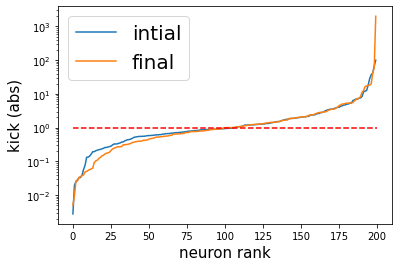

In [4]:
plt.plot(np.arange(w), np.sort(np.abs(cornerss[0])))
plt.plot(np.arange(w), np.sort(np.abs(cornerss[-1])))
plt.yscale('log')
#plt.ylim(0,5)
plt.plot([0, w], [a,a], ls="--", color="red")
plt.legend(["intial", "final"], fontsize=20)
#plt.text(100,25,"a=20", fontsize=20, color="red")

plt.xlabel("neuron rank", fontsize=15)
plt.ylabel("kick (abs)", fontsize=15)

For $a=1$: At initialization, there are about 50\% useless neurons. After training, these 50\% neurons remain useless. 

In general, useless neurons at intialization remains useless throughout training.